In [1]:
from scipy import special as sp
import numpy as np
import matplotlib.pyplot as plt
import miepython
import pandas as pd
import csv

from ipynb.fs.full.mie_functions_1 import *

/home/niya/.local/lib/python3.6/site-packages/numba/core/errors.py:154: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


## Importing data

In [2]:
# Import data for aluminium (Al)
# from https://refractiveindex.info/?shelf=main&book=Al&page=McPeak
ref_lam, ref_n, ref_k = import_data("McPeak_aluminium.csv")

In [3]:
# Import data for copper (Cu)
# from https://refractiveindex.info/?shelf=main&book=Cu&page=McPeak#google_vignette
ref_lam, ref_n, ref_k = import_data("McPeak_copper.csv")

In [4]:
# Import data for silver (Ag)
# from https://refractiveindex.info/?shelf=main&book=Ag&page=McPeak
ref_lam, ref_n, ref_k = import_data("McPeak_silver.csv")

In [5]:
# Import data for gold (Au)
# from https://refractiveindex.info/?shelf=main&book=Au&page=McPeak
ref_lam, ref_n, ref_k = import_data("McPeak_gold.csv")

## Parameters

In [6]:
# Define parameters

a = 0.04                    # radius in microns
m = ref_n - 1.0j * ref_k   # index of refraction
cross_section_area = np.pi * (a ** 2)
mu_a = 4 * np.pi * ref_k / ref_lam    # nm

k = wavenumber(ref_lam, 1) #1 for vacuum   

In [7]:
# Arguments for Bessel and Hankel functions

x = k * a
y = m * k * a

## Numerical Solution

In [8]:
# Numerical solution 
# from https://miepython.readthedocs.io/en/latest/

qext, qsca, qback, g = miepython.mie(m, x)

sca_cross_section = qsca * cross_section_area
ext_cross_section = qext * cross_section_area
abs_cross_section = (qext - qsca) * cross_section_area

## Analytical Solution with Dipole Approximation

In [9]:
# Find coefficients 

a_1 = a_1_list(m, ref_lam, a)
b_1 = b_1_list(m, ref_lam, a)

In [10]:
# Find scattering, extinction and absorption cross-sections for imported data
 
sca_cross_section_an = sca_cross_section_analytical(a_1, b_1, ref_lam) # electric + magnetic dipole
sca_cross_section_no_mag = sca_cross_section_analytical(a_1, 0, ref_lam) # only electric dipole

ext_cross_section_an = ext_cross_section_analytical(a_1, b_1, ref_lam)
ext_cross_section_no_mag = ext_cross_section_analytical(a_1, 0, ref_lam)

abs_cross_section_an = ext_cross_section_an - sca_cross_section_an
abs_cross_section_no_mag = ext_cross_section_no_mag - sca_cross_section_no_mag

## Plotting Scattering Cross Section

True

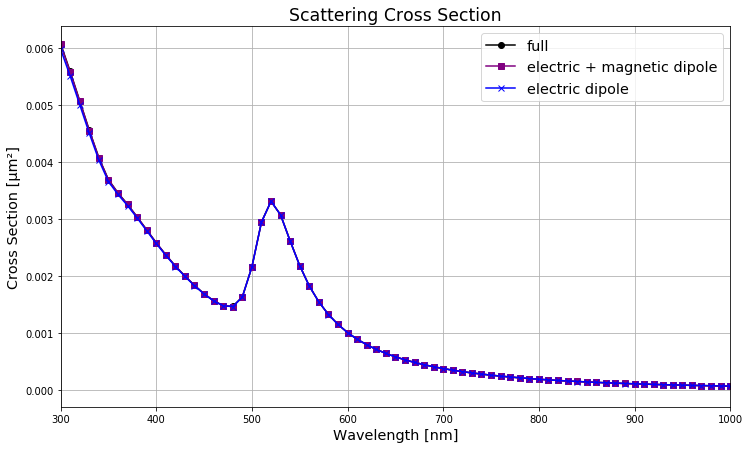

In [11]:
# Plot numerical and approximated analytical absorption cross-section 

plot_cross_section(ref_lam, sca_cross_section, sca_cross_section_an, sca_cross_section_no_mag, 
                   figtitle = 'Scattering Cross Section', savefig = True, 
                   savefigtitle = 'scattering_approximation_plot.pdf')

True

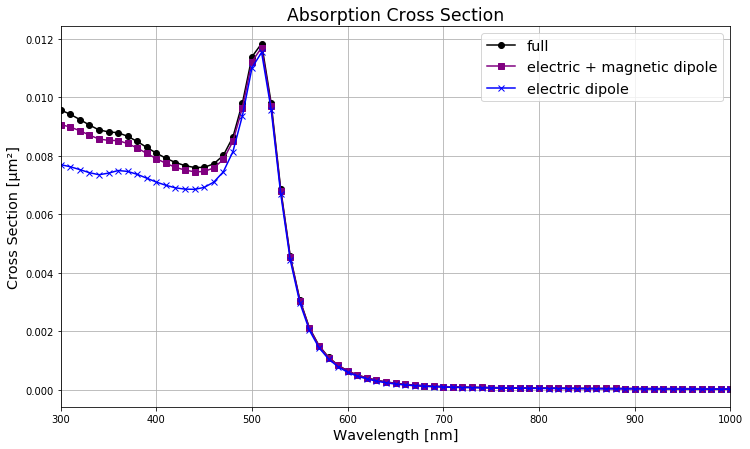

In [12]:
# Plot numerical and approximated analytical absorption cross-section 

plot_cross_section(ref_lam, abs_cross_section, abs_cross_section_an, abs_cross_section_no_mag, 
                   figtitle = 'Absorption Cross Section', savefig = True, 
                   savefigtitle = 'absorption_approximation_plot.pdf')

True

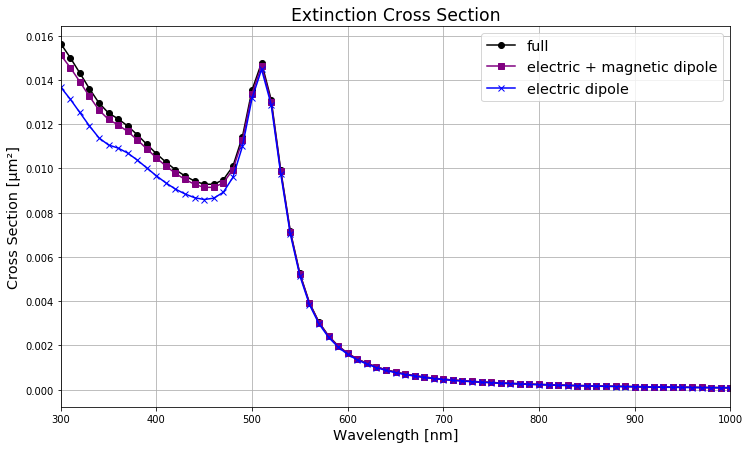

In [13]:
# Plot numerical and approximated analytical extinction cross-section 
plot_cross_section(ref_lam, ext_cross_section, ext_cross_section_an, ext_cross_section_no_mag, 
                   figtitle = 'Extinction Cross Section', savefig = True, 
                   savefigtitle = 'extinction_approximation_plot.pdf')

True

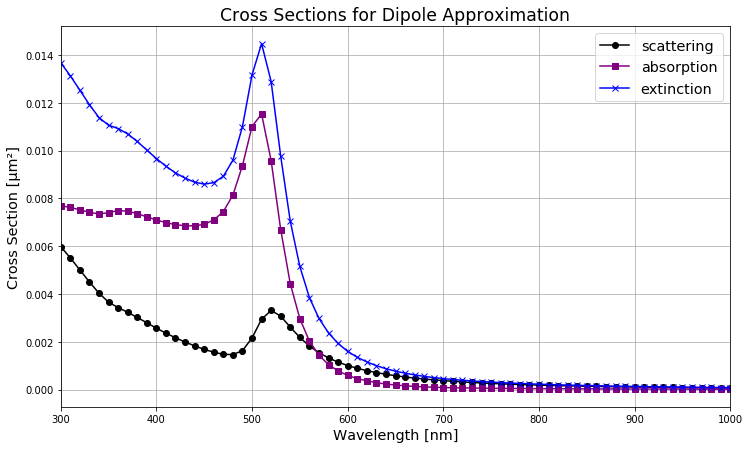

In [14]:
# Plot all three approximated cross-sections
plot_cross_section(ref_lam, sca_cross_section_no_mag, abs_cross_section_no_mag, ext_cross_section_no_mag, 
                   label1 = 'scattering', label2 = 'absorption', label3 = 'extinction',
                   figtitle = 'Cross Sections for Dipole Approximation')

## Plotting Scattered Field ( + txt File with Field Values)

ipynb.fs.full.mie_functions_1:411: RuntimeWarning: divide by zero encountered in double_scalars


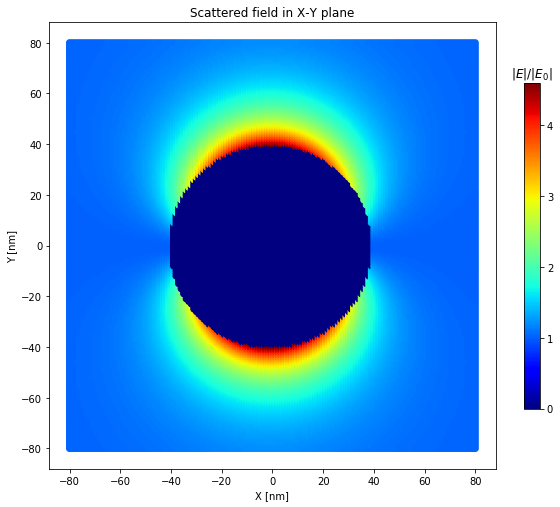

('At incoming wavelength of 540.0 nm',
 'Maximum scattered field = 4.606522794349922 E_0')

In [15]:
x_points = np.arange(-80, 81, 1)   # in nm
y_points = np.arange(-80, 81, 1)   # in nm
z = 0.001 # in nm

#Mine
plot_scattered_field(x_points, y_points, z, m, ref_lam, a, filename = 'coordinates.txt', lam_value = 0.54)

In [ ]:
# Wikipedia
plot_scattered_field(x_points, y_points, z, m, ref_lam, a, filename = 'coordinates.txt', lam_value = 0.54, wiki = True)

In [ ]:
# Guzatov et al, using b_1 coefficients for a_1 coefficients

plot_scattered_field(x_points, y_points, z, m, ref_lam, a, filename = 'coordinates.txt', lam_value = 0.54, JoPhCh = True)

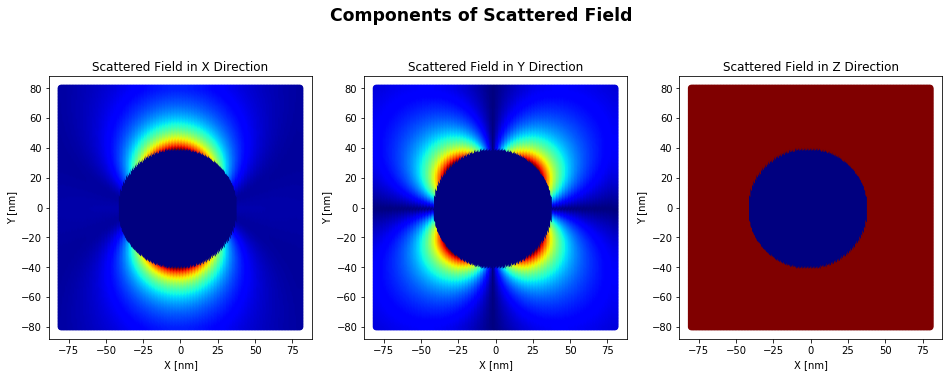

(4.49664733243999,
 2.262801676351462,
 1.0001075054841557,
 array([0., 0., 0., ..., 0., 0., 0.]))

In [16]:
# Mine
scattered_field_components(x_points, y_points, z, m, ref_lam, a, lam_value = 0.54)

In [ ]:
# Wikipedia

scattered_field_components(x_points, y_points, z, m, ref_lam, a, lam_value = 0.54, wiki = True)

In [ ]:
# Guzatov et al

scattered_field_components(x_points, y_points, z, m, ref_lam, a, lam_value = 0.54, JoPhCh = True)